In [1]:
import pandas as pd
import numpy as np

import utils
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
from ego_graph_dataset import *

from pattern_mining import pattern_frequency
import numpy as np

In [2]:
dataset_name = 'mutagenicity'
available_metrics = ["sum", "entropy", "cosine", "cheb", "likelyhood", "likelyhood_max", "hamming",
                           "focal_loss"]

In [3]:
def plot_explanation(metric='cosine', rule=23, graph_id=1, fixed_size=True, size=3):
    data = select_active_graph(f"./activ_ego/mutag_{rule}labels_egos.txt", index_to_select=[graph_id])
    data = data[0]
    df_node_score = pd.read_csv(os.path.join("./results/mutagenicity/gcn/gstarx",
                             f"rule_{rule}/result_{dataset_name}_{rule}_{graph_id}.csv"))
    node_score = df_node_score[metric].values
    coalition = scores2coalition(node_score, sparsity=0.5, fixed_size=True, size=3,method='split_top')
    title_sentence = f"Explanation {dataset_name} rule {rule} with {metric} for graph {graph_id}:"
    node_attrs = data.x
    data['label'] = node_attrs
    plot = PlotUtils(dataset_name, is_show=True)
    plot.plot(utils.to_networkx(data,to_undirected=True, node_attrs=['label', 'center']),
              coalition, x=data.x,words='', title_sentence=title_sentence,figname='test.png')

In [4]:
def plot_correlation_matrix(rule, graph_id,method='kendall'):
    df_node_score = pd.read_csv(os.path.join("./results/mutagenicity/gcn/gstarx",
                             f"rule_{rule}/result_{dataset_name}_{rule}_{graph_id}.csv"))
    corr = df_node_score.corr(method=method)
    sns.set(style="whitegrid")
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5, ax=ax)
    plt.show()

In [5]:
def plot_explanation_and_correlation(rule, graph_id, method='kendall', metric='cosine'):
    plot_explanation(metric=metric, rule=rule, graph_id=graph_id)
    plot_correlation_matrix(rule=rule, graph_id=graph_id, method=method)

def plot_explanation_for_list_of_graphs(rule, list_of_graphs, metric='cosine', method='kendall'):
    for graph_id in list_of_graphs:
        plot_explanation(metric=metric, rule=rule, graph_id=graph_id)
        df_nodes_score = pd.read_csv(os.path.join("./results/mutagenicity/gcn/gstarx",
                             f"rule_{rule}/result_{dataset_name}_{rule}_{graph_id}.csv"))
        print(np.sort(df_nodes_score[metric].values))

def plot_explanation_and_corr_for_list_of_graphs(rule, list_of_graphs, metrics=['cosine'], method='kendall'):
    for graph_id in list_of_graphs:
        for metric in metrics:
            plot_explanation_and_correlation(rule=rule, graph_id=graph_id, method=method, metric=metric)

Number of graphs: 2923


/home/elouan/epita/lre/first_GNN/venv/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
  alpha=alpha,


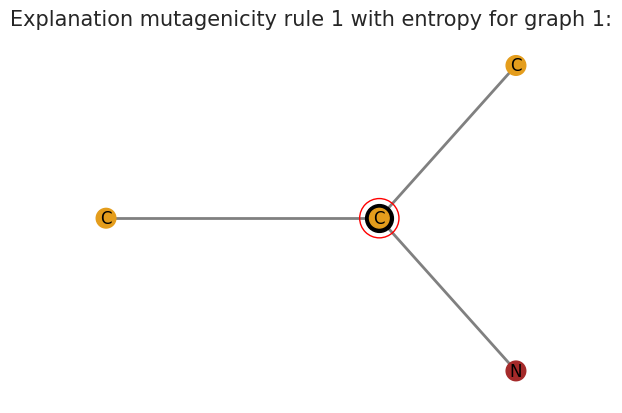

[-52.66583252 -16.79145813 -16.79144669  42.935112  ]
Number of graphs: 2923


/home/elouan/epita/lre/first_GNN/venv/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
  alpha=alpha,


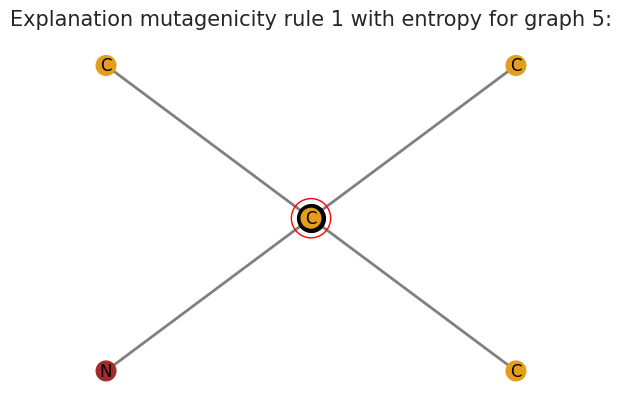

[-52.66545486 -16.79136276 -16.79132271 -16.79132271  57.37373734]
Number of graphs: 2923


/home/elouan/epita/lre/first_GNN/venv/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: Passing *transOffset* without *offsets* has no effect. This behavior is deprecated since 3.5 and in 3.6, *transOffset* will begin having an effect regardless of *offsets*. In the meantime, if you wish to set *transOffset*, call collection.set_offset_transform(transOffset) explicitly.
  alpha=alpha,


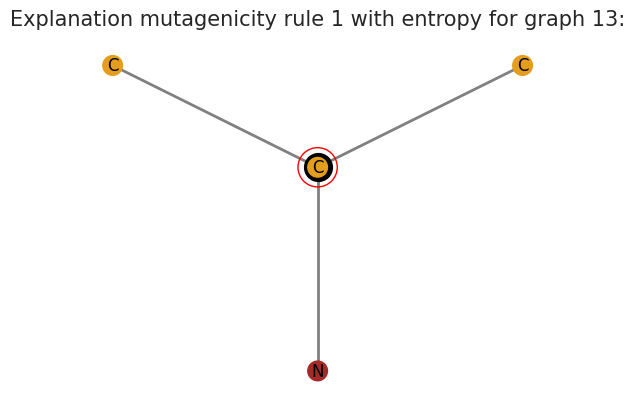

[-52.66587448 -16.79144859 -16.79144478  42.935112  ]


In [6]:
plot_explanation_for_list_of_graphs(rule=1, list_of_graphs=[1,5,13], metric='entropy', method='kendall')

In [7]:

frequent_itemsets, a_rules = pattern_frequency('results/mutagenicity/gcn/gstarx', metric="entropy", rule=23,
                  dataset_name="mutagenicity", graph_ids=np.arange(0, 2581), fixed_size=True, size=3, sparsity=0.5)


Building transactions...

Number of graphs: 4278


/home/elouan/epita/lre/gnn_exaplainability/src/ego_graph_dataset.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if index_to_select == []:
100%|██████████| 2581/2581 [00:10<00:00, 256.98it/s]


Skipped 0 graphs because the corresponding file is empty. The size of the graph can lead to a to long HN value computation and therefore, we chose to skip the graph. Here is the detail of skipped graphs with their size:
 []


Transactions built.

/home/elouan/epita/lre/first_GNN/venv/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


In [8]:
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
1,1.000000,(H)
0,0.997675,(C)
3,0.997675,"(H, C)"
2,0.506393,(N)
5,0.506393,"(H, N)"
4,0.504068,"(C, N)"
6,0.504068,"(H, C, N)"


In [9]:
frequent_itemsets.sort_values(by='support', ascending=False)
a_rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(C),(H),0.997675,1.000000,0.997675,1.000000,1.000000,0.000000,inf,0.000000
5,(N),(H),0.506393,1.000000,0.506393,1.000000,1.000000,0.000000,inf,0.000000
8,"(C, N)",(H),0.504068,1.000000,0.504068,1.000000,1.000000,0.000000,inf,0.000000
0,(H),(C),1.000000,0.997675,0.997675,0.997675,1.000000,0.000000,1.000000,0.000000
3,(N),(C),0.506393,0.997675,0.504068,0.995409,0.997729,-0.001147,0.506393,-0.004591
7,"(H, N)",(C),0.506393,0.997675,0.504068,0.995409,0.997729,-0.001147,0.506393,-0.004591
11,(N),"(H, C)",0.506393,0.997675,0.504068,0.995409,0.997729,-0.001147,0.506393,-0.004591
4,(H),(N),1.000000,0.506393,0.506393,0.506393,1.000000,0.000000,1.000000,0.000000
2,(C),(N),0.997675,0.506393,0.504068,0.505243,0.997729,-0.001147,0.997675,-0.494757
6,"(H, C)",(N),0.997675,0.506393,0.504068,0.505243,0.997729,-0.001147,0.997675,-0.494757


# TODO
- [ ] approximation de la HN value pour les graphes >10
- [ ] sous-graph dans les transactions

In [10]:
from build_transaction import build_counting_transaction
import numpy as np

In [11]:
transactions = build_counting_transaction('results/mutagenicity/gcn/gstarx', metric="entropy", rule=23,
                  dataset_name="mutagenicity", graph_ids=np.arange(0, 3490), fixed_size=True, size=3, sparsity=0.5)

/home/elouan/epita/lre/gnn_exaplainability/src/build_transaction.py:106: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  index=graph_ids)


Number of graphs: 4278


/home/elouan/epita/lre/gnn_exaplainability/src/ego_graph_dataset.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if index_to_select == []:
100%|██████████| 3490/3490 [00:10<00:00, 329.08it/s]


In [12]:
transactions.head()

0    [C1, C2, C3, H1, H2, H3]
1    [C1, C2, C3, C4, H1, H2]
2    [C1, C2, C3, C4, H1, H2]
3    [C1, C2, C3, C4, H1, H2]
4        [C1, C2, O1, H1, N1]
dtype: object

In [13]:
# Perform LCM closed pattern mining
from skmine.itemsets import LCM

In [14]:
lcm = LCM(min_supp=1000, n_jobs=4)

In [15]:
pattern = lcm.fit_transform(transactions)
print(pattern.shape)
pattern

(15, 2)


,itemset,support
0,[H1],3490
1,"[C1, H1]",3482
2,"[C1, C2, H1]",3381
3,"[H1, H2]",2799
4,"[C1, H1, H2]",2791
5,"[C1, C2, H1, H2]",2690
6,"[C1, C2, C3, H1]",1955
7,"[C1, C2, C3, H1, H2]",1530
8,"[H1, N1]",1735
9,"[C1, H1, N1]",1728


In [16]:
number_of_graphs=2923
frequent_itemsets, a_rules = pattern_frequency('results/mutagenicity/gcn/gstarx', metric="entropy", rule=1,
                  dataset_name="mutagenicity", graph_ids=np.arange(0, number_of_graphs), fixed_size=True, size=3, sparsity=0.5, method='split_top')

Building transactions...

Number of graphs: 2923


/home/elouan/epita/lre/gnn_exaplainability/src/ego_graph_dataset.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if index_to_select == []:
100%|██████████| 2923/2923 [00:09<00:00, 308.70it/s]

Skipped 14 graphs because the corresponding file is empty. The size of the graph can lead to a to long HN value computation and therefore, we chose to skip the graph. Here is the detail of skipped graphs with their size:
 [(499, 1), (798, 1), (1690, 1), (2365, 1), (2378, 1), (2406, 1), (2407, 1), (2418, 1), (2621, 1), (2735, 1), (2822, 1), (2823, 1), (2853, 1), (2912, 1)]


Transactions built.

/home/elouan/epita/lre/first_GNN/venv/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


In [17]:
frequent_itemsets.sort_values(by='support', ascending=False)
a_rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(N),(C),0.966311,0.992437,0.966311,1.000000,1.00762,0.007308,inf,0.22449
0,(C),(N),0.992437,0.966311,0.966311,0.973675,1.00762,0.007308,1.279722,1.00000


In [18]:
transactions = build_counting_transaction('results/mutagenicity/gcn/gstarx', metric="entropy", rule=1,
                  dataset_name="mutagenicity", graph_ids=np.arange(0, 2923), fixed_size=True, size=3, sparsity=0.5, method='split_top')

/home/elouan/epita/lre/gnn_exaplainability/src/build_transaction.py:106: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  index=graph_ids)
/home/elouan/epita/lre/gnn_exaplainability/src/ego_graph_dataset.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if index_to_select == []:


Number of graphs: 2923


100%|██████████| 2923/2923 [00:08<00:00, 354.42it/s]

Skipped 14 graphs because the corresponding file is empty. The size of the graph can lead to a to long HN value computation and therefore, we chose to skip the graph. Here is the detail of skipped graphs with their size:
 [(499, 1), (798, 1), (1690, 1), (2365, 1), (2378, 1), (2406, 1), (2407, 1), (2418, 1), (2621, 1), (2735, 1), (2822, 1), (2823, 1), (2853, 1), (2912, 1)]
[499, 798, 1690, 2365, 2378, 2406, 2407, 2418, 2621, 2735, 2822, 2823, 2853, 2912]


In [19]:
lcm = LCM(min_supp=1000, n_jobs=4)
pattern = lcm.fit_transform(transactions)
print(pattern.shape)
pattern

(4, 2)


,itemset,support
0,[C1],2887
1,"[C1, C2]",2836
2,"[C1, N1]",2811
3,"[C1, C2, N1]",2760


In [24]:
def pattern_mining(rule, method, metric, nb_graphs):
    print('Apriori algorithm ...')
    number_of_graphs=292
    frequent_itemsets, a_rules = pattern_frequency('results/mutagenicity/gcn/gstarx', metric=metric, rule=rule,
                  dataset_name="mutagenicity", graph_ids=np.arange(0,nb_graphs), fixed_size=True, size=3, sparsity=0.5, method=method)
    frequent_itemsets.sort_values(by='support', ascending=False)
    a_rules.sort_values(by='confidence', ascending=False)
    print('LCM algorithm ...')
    transactions = build_counting_transaction('results/mutagenicity/gcn/gstarx', metric=metric, rule=rule,
                  dataset_name="mutagenicity", graph_ids=np.arange(0,nb_graphs), fixed_size=True, size=3, sparsity=0.5, method=method)
    lcm = LCM(min_supp=1000, n_jobs=4)
    pattern = lcm.fit_transform(transactions)
    pattern

    return frequent_itemsets, a_rules, pattern

In [26]:
frequent_itemsets_apriori, a_rules_apriori, pattern_lcm = pattern_mining(rule=1, method='split_top', metric='entropy', nb_graphs=2923 )

Apriori algorithm ...


Building transactions...

Number of graphs: 2923


/home/elouan/epita/lre/gnn_exaplainability/src/ego_graph_dataset.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if index_to_select == []:
100%|██████████| 2923/2923 [00:09<00:00, 324.53it/s]


Skipped 14 graphs because the corresponding file is empty. The size of the graph can lead to a to long HN value computation and therefore, we chose to skip the graph. Here is the detail of skipped graphs with their size:
 [(499, 1), (798, 1), (1690, 1), (2365, 1), (2378, 1), (2406, 1), (2407, 1), (2418, 1), (2621, 1), (2735, 1), (2822, 1), (2823, 1), (2853, 1), (2912, 1)]


Transactions built.

/home/elouan/epita/lre/first_GNN/venv/lib/python3.7/site-packages/mlxtend/frequent_patterns/fpcommon.py:114: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,
/home/elouan/epita/lre/gnn_exaplainability/src/build_transaction.py:106: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  index=graph_ids)


LCM algorithm ...


/home/elouan/epita/lre/gnn_exaplainability/src/ego_graph_dataset.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if index_to_select == []:


Number of graphs: 2923


100%|██████████| 2923/2923 [00:07<00:00, 391.02it/s]


Skipped 14 graphs because the corresponding file is empty. The size of the graph can lead to a to long HN value computation and therefore, we chose to skip the graph. Here is the detail of skipped graphs with their size:
 [(499, 1), (798, 1), (1690, 1), (2365, 1), (2378, 1), (2406, 1), (2407, 1), (2418, 1), (2621, 1), (2735, 1), (2822, 1), (2823, 1), (2853, 1), (2912, 1)]
[499, 798, 1690, 2365, 2378, 2406, 2407, 2418, 2621, 2735, 2822, 2823, 2853, 2912]


In [27]:
pattern_lcm

,itemset,support
0,[C1],2887
1,"[C1, C2]",2836
2,"[C1, N1]",2811
3,"[C1, C2, N1]",2760


In [28]:
frequent_itemsets_apriori

,support,itemsets
0,0.992437,(C)
1,0.966311,(N)
2,0.966311,"(C, N)"


In [29]:
a_rules_apriori

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(C),(N),0.992437,0.966311,0.966311,0.973675,1.00762,0.007308,1.279722,1.00000
1,(N),(C),0.966311,0.992437,0.966311,1.000000,1.00762,0.007308,inf,0.22449
